In [1]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras
# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf
# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu
from keras_retinanet.utils.visual import draw_caption1



def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# use this to change which GPU to use
gpu = 0

# set the modified tf session as backend in keras
setup_gpu(gpu)

Using TensorFlow backend.


In [2]:
# adjust this to point to your downloaded/trained model
# models can be downloaded here: https://github.com/fizyr/keras-retinanet/releases
model_path = os.path.join('/home/victor/keras-retinanet/', 'snapshots', 'resnet50_visdataset_45.h5')

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')

# if the model is not converted to an inference model, use the line below
# see: https://github.com/fizyr/keras-retinanet#converting-a-training-model-to-inference-model
model = models.convert_model(model)

#print(model.summary())

# load label to names mapping for visualization purposes
labels_to_names = {0: 'person', 1: 'cyclist', 2: 'Car', 3: 'motorcyclist', 4: 'tricyclist', 5: 'Bus', 6: 'wheelchairuser', 7: 'Truck', 8: 'Ambulance'}

OSError: Unable to open file (unable to open file: name = '/home/victor/keras-retinanet/snapshots/resnet50_visdataset_45.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [3]:
# adjust this to point to your downloaded/trained model
# models can be downloaded here: https://github.com/fizyr/keras-retinanet/releases
model_path = os.path.join('/home/victor/keras-retinanet/', 'snapshots', 'resnet50_visdataset_47.h5')

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')

# if the model is not converted to an inference model, use the line below
# see: https://github.com/fizyr/keras-retinanet#converting-a-training-model-to-inference-model
model = models.convert_model(model)

#print(model.summary())

# load label to names mapping for visualization purposes
labels_to_names = {0: 'Ignored Region ', 1: 'Pedestrian', 2: 'People', 3: 'cyclist', 4: 'Car', 5: 'Vans', 6: 'Truck', 7: 'Tricyclist', 8: 'Awning-Tricyclist', 9: 'Bus', 10: 'Motor', 11: 'Others'}

tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

In [42]:
# load image
path='/home/victor/Frame/video/qjn'
image = read_image_bgr(path+'000006.jpg')

In [4]:
# load image
path='/home/victor/Downloads/VisDrone2019-DET-test-dev/images/'
image = read_image_bgr(path+'0000265_04000_d_0000009.jpg')

processing time:  2.3927786350250244
Car 0.994
Car 0.990
Car 0.986
Car 0.985
Car 0.963
Motor 0.959
Vans 0.954
Car 0.941
Car 0.930
Motor 0.913
Car 0.909
Vans 0.857
Car 0.843
Car 0.816
Car 0.801
Motor 0.798
Vans 0.794
Pedestrian 0.789
Vans 0.745
Motor 0.725
Vans 0.724
Tricyclist 0.711
Vans 0.692
Car 0.664
Car 0.656
Pedestrian 0.655
Car 0.634
Car 0.630
Motor 0.624
Vans 0.618
Pedestrian 0.604
Car 0.557
Tricyclist 0.550
Motor 0.550
Motor 0.515


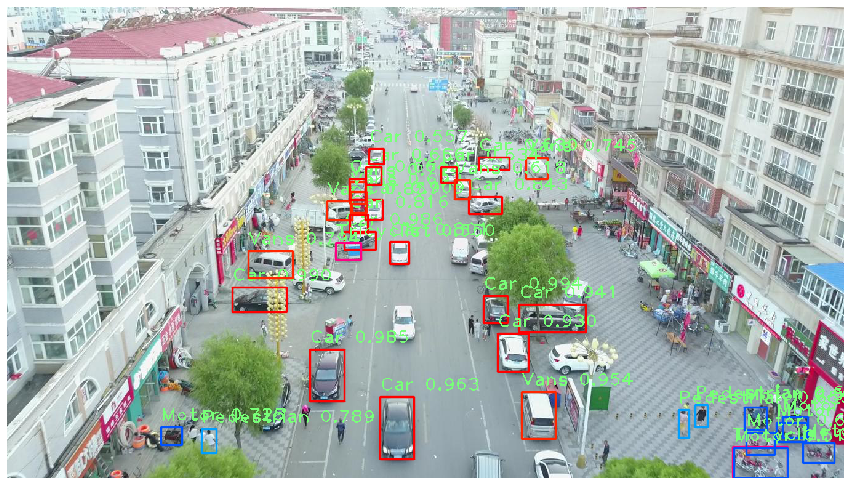

True

In [5]:

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color,thickness=2)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    print(caption)
    draw_caption1(draw, b, caption,size=2,thickness=2,R=120,G=255,B=120)
    #cv2.imwrite('/home/victor/keras-retinanet/result'+caption+'.jpg',draw1)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()
save_img=cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)
cv2.imwrite('/home/victor/keras-retinanet/result_vis.jpg',save_img)